# Importing

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Import Dataset

# Importing Data

path = r'C:\Users\mkock\Desktop\Data Analytics\Data Immersion\Achievement 6\2022-05 Heart Disease Analysis'

df_heart = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Heart_2020_clean.csv'))

# Data Cleaning

In [10]:
df_heart.head()

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [18]:
df_heart.dtypes

Unnamed: 0            int64
HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [5]:
# Check for missing values

df_heart.isnull().sum()

# No missing values to handle

Unnamed: 0          0
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
# Check for Duplicates

dups = df_heart.duplicated()

In [7]:
dups.shape # No duplicates

(301717,)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MentalHealth', ylabel='Density'>

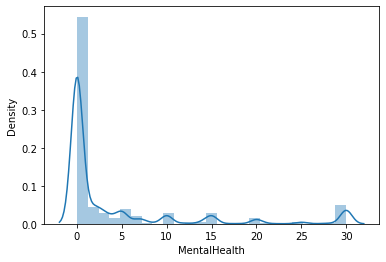

In [9]:
# Shows extreme values

sns.distplot(df_heart['MentalHealth'], bins=25) 

It seems as if there are many outliers at "30" however, i would not classify them as such, since it is 2287 entries at "30". To analyse people who suffer from mental health issues, the "0" value should be removed

In [25]:
df_heart['MentalHealth'].mean() # Check the mean

4.121474759460024

In [26]:
df_heart['MentalHealth'].median() # Check the median

0.0

In [27]:
df_heart['MentalHealth'].max() # Check the max

30.0

# Data prep for regression Analysis

In [75]:
# Make subsets of Heartdisease column

df_yes = (df_heart[df_heart['HeartDisease'] == "Yes"])
df_no = (df_heart[df_heart['HeartDisease'] == "No"])

In [73]:
df_yes.head()

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [74]:
df_yes.shape

(27261, 19)

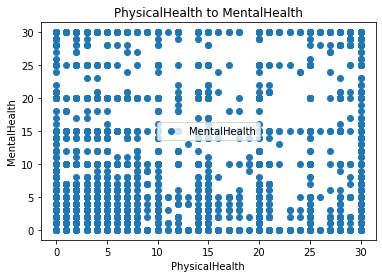

In [58]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_yes.plot(x = 'PhysicalHealth', y='MentalHealth',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('PhysicalHealth to MentalHealth')  
plt.xlabel('PhysicalHealth')  
plt.ylabel('MentalHealth')  
plt.show()

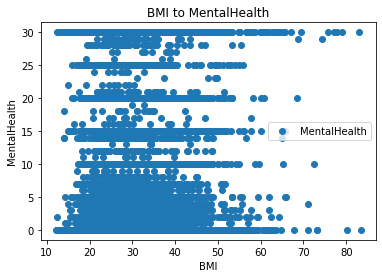

In [62]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_yes.plot(x = 'BMI', y='MentalHealth',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('BMI to MentalHealth')  
plt.xlabel('BMI')  
plt.ylabel('MentalHealth')  
plt.show()

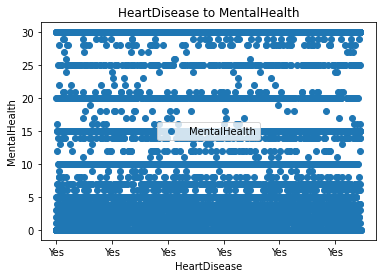

In [61]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_yes.plot(x = 'HeartDisease', y='MentalHealth',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('HeartDisease (Yes) to MentalHealth')  
plt.xlabel('HeartDisease')  
plt.ylabel('MentalHealth')  
plt.show()

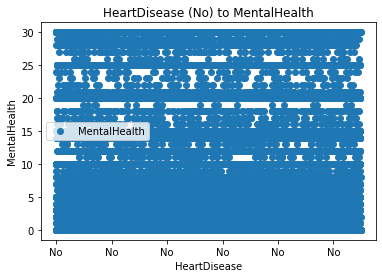

In [76]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_no.plot(x = 'HeartDisease', y='MentalHealth',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('HeartDisease (No) to MentalHealth')  
plt.xlabel('HeartDisease')  
plt.ylabel('MentalHealth')  
plt.show()

Original Hypothesis: People with many days in a month where their mental health is bad, are more susceptible to heart 
disease than people who have few days in a month where their mental health is bad.

New Hypothesis: People that have been diagnosed with a heart disease, and have many days in the past 30 days where their physical health was bad, are more likely to struggle with many days where their mental health is also bad, than people who have few days in the past 30 days where their physical health was bad.

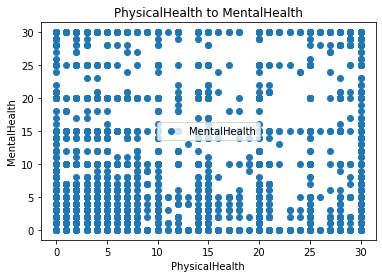

In [84]:
# Plot we are focussing on:

df_yes.plot(x = 'PhysicalHealth', y='MentalHealth',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('PhysicalHealth to MentalHealth')  
plt.xlabel('PhysicalHealth')  
plt.ylabel('MentalHealth')  
plt.show()

In [85]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_yes['PhysicalHealth'].values.reshape(-1,1)
y = df_yes['MentalHealth'].values.reshape(-1,1)

In [86]:
X


array([[ 6.],
       [30.],
       [10.],
       ...,
       [ 0.],
       [ 0.],
       [ 7.]])

In [87]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [88]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [89]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [90]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [91]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

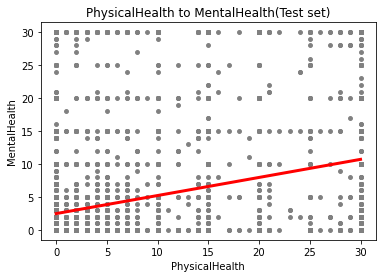

In [92]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('PhysicalHealth to MentalHealth(Test set)')
plot_test.xlabel('PhysicalHealth')
plot_test.ylabel('MentalHealth')
plot_test.show()

There is very little correlation between the 2 values, but as the amount of days where physical health was bad, increases, so does the days where mental health was bad, even if it is just slightly. There are condensed areas when both values are at '0 days' and when both values are at '30 days' 

In [93]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [94]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.27436366]]
Mean squared error:  75.30311328708821
R2 score:  0.1260383404365446


In [44]:
y_predicted

array([[3.13982445],
       [3.42102661],
       [3.13982445],
       ...,
       [3.13982445],
       [3.13982445],
       [3.13982445]])

In [95]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,10.0,10.708316
1,30.0,10.708316
2,0.0,2.477407
3,0.0,2.477407
4,0.0,2.477407
5,0.0,2.477407
6,7.0,3.026134
7,0.0,6.592862
8,0.0,2.477407
9,0.0,2.477407


# Compare how the regression fits the training set

In [96]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [97]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [98]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.27436366]]
Mean squared error:  73.66361115756412
R2 score:  0.11892173028702191


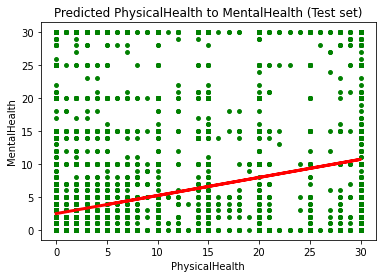

In [100]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Predicted PhysicalHealth to MentalHealth (Test set)')
plot_test.xlabel('PhysicalHealth')
plot_test.ylabel('MentalHealth')
plot_test.show()

Based on the MSE being large (73.66) compared to the size of the value points, I do no think the regression model is suitable for this dataset. This is substanciated by the low value of R2, 0.12. Since the dataset is to do with complete random events of survey data, it is understandable that the regression model does not work well with the data due to high chance of bias in survey data. We can also see by doing a manual check at the array created above, that the error rate is high and there is a big differene between most of the actual and predicted values.